In [24]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy
import ast

In [25]:
df=pd.read_csv("business_data_cut.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 15 columns):
Unnamed: 0      19260 non-null int64
address         18501 non-null object
attributes      16395 non-null object
business_id     19260 non-null object
categories      19212 non-null object
city            19260 non-null object
hours           14694 non-null object
is_open         19260 non-null int64
latitude        19260 non-null float64
longitude       19260 non-null float64
name            19260 non-null object
postal_code     19188 non-null object
review_count    19260 non-null int64
stars           19260 non-null float64
state           19260 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 2.2+ MB


In [4]:
df.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) # removing unwanted columns

In [26]:
# Cleaning NaN rows where categories is NaN
df = df.dropna(subset=["categories"])
# select those rows where column categories contains value Restaurants
restaurant_df = df[df['categories'].str.contains("Restaurants")==True]

In [27]:
restaurant_df = restaurant_df[restaurant_df.is_open != 0] # select only those rows where is_open==1

In [8]:
restaurant_df.drop(["is_open"], axis=1, inplace=True) # drop columnn is_open

In [9]:
restaurant_df[["stars","review_count"]].describe()

,stars,review_count
count,4139.000000,4139.000000
mean,3.457598,80.577676
std,0.813478,199.773026
min,1.000000,3.000000
25%,3.000000,9.000000
50%,3.500000,25.000000
75%,4.000000,75.000000
max,5.000000,4227.000000


In [10]:
#Which cities provide the most restaurant
x=restaurant_df['city'].value_counts() 

x.index.values[0]

'Toronto'

In [11]:
#Which cities have the best restaurants
restaurant_df['city'][(restaurant_df['stars']==5)& (restaurant_df['review_count'].max())].value_counts()

Las Vegas           14
Montréal            13
Toronto              9
Phoenix              8
Calgary              7
Charlotte            6
Scottsdale           5
Tempe                4
Mississauga          4
Henderson            3
Cleveland            3
Pittsburgh           3
Madison              2
McKeesport           2
Verona               2
Brossard             1
Olmsted Falls        1
Fort Mill            1
Boisbriand           1
Thornhill            1
Lorain               1
Newmarket            1
Harrisburg           1
North Las Vegas      1
Fairview Park        1
Chandler             1
Beeton               1
Mayfield Heights     1
Elyria               1
Hudson               1
Champaign            1
Gibsonia             1
Saint-Hubert         1
Laval                1
Mesa                 1
La Prairie           1
Avon Lake            1
West Homestead       1
Brampton             1
Blainville           1
Medina               1
Eastlake             1
Markham              1
LaSalle    

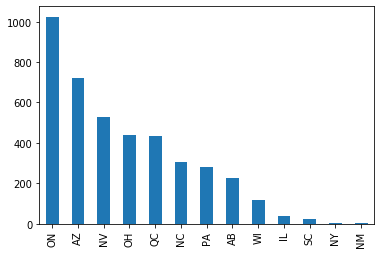

In [12]:
restaurant_df["state"].value_counts().plot(kind='bar')

# Count of restaurants having particular category

In [13]:
def category_count(category_name):
    restaurant_df['categories'].str.contains(category_name).value_counts().plot(kind='bar',table=True)

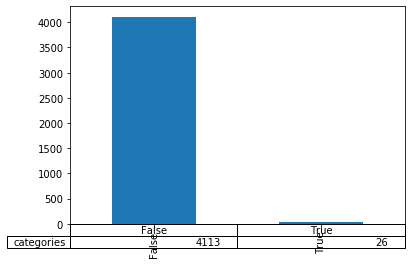

In [14]:
category_count('Dim Sum')

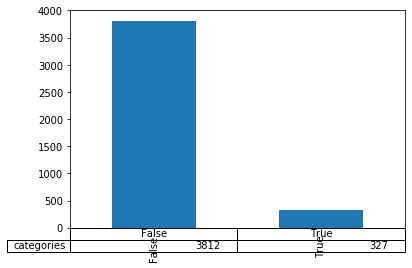

In [15]:
category_count('Mexican')

In [16]:
unique_list=list(restaurant_df['state'].unique())

In [17]:
state=pd.read_csv("states.csv")
states_list=list(state['Abbreviation'])

In [18]:
# find out non us state list
not_usa=[]
for state in unique_list:
    if state not in states_list:
        not_usa.append(state)

In [19]:
not_usa

['ON', 'QC', 'AB']

In [20]:
#select only those rows where state is in US
restaurant_df = restaurant_df[~restaurant_df.state.isin(not_usa)]
# or can write this way
#restaurant_df = restaurant_df[restaurant_df.state.isin(states_list)]

In [21]:
# Cleaning NaN rows where address is NaN
restaurant_df = restaurant_df.dropna(subset=["address"])

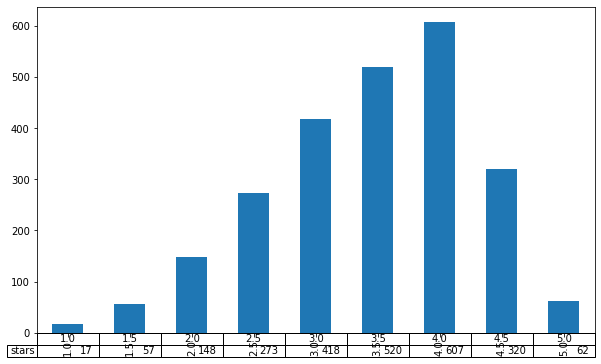

In [22]:
restaurant_df["stars"].value_counts().sort_index().plot(kind='bar',figsize=(10,6),table=True)

In [29]:
unique_stars=sorted(restaurant_df['stars'].unique())
list_mean=[]
for st in unique_stars:
    list_mean.append(restaurant_df['review_count'][restaurant_df['stars']==st].mean())
list_mean

[6.0,
 14.409090909090908,
 19.923728813559322,
 37.11574074074074,
 52.25034965034965,
 85.24369747899159,
 127.19208494208495,
 107.63345864661655,
 32.51724137931034]

<BarContainer object of 9 artists>

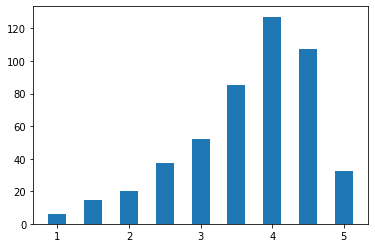

In [30]:
plt.bar(unique_stars,height=list_mean,width=0.25) # Plot number of reviews against the star rating

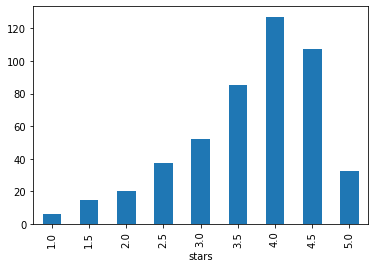

In [31]:
restaurant_df.groupby("stars")['review_count'].mean().plot(kind='bar')

In [32]:
dummy_cat=restaurant_df['categories'].str.get_dummies(sep=',')# separating the categories


In [33]:
dummy_cat.head()

,Acai Bowls,Accessories,Active Life,Adult Education,Adult Entertainment,Afghan,African,Airport Shuttles,Amateur Sports Teams,American (New),...,Ukrainian,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waxing,Wine Bars,Wine Tasting Classes,Wineries,Wraps
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
categories_sum=dummy_cat.sum(axis=0)

In [35]:
categories_sum.sort_values(ascending=False)

 Restaurants                  2958
Restaurants                   1181
 Food                          914
 Nightlife                     532
 Bars                          485
 Fast Food                     435
 American (Traditional)        425
 Sandwiches                    421
 Burgers                       339
 Breakfast & Brunch            338
 Pizza                         322
 American (New)                255
 Coffee & Tea                  235
 Italian                       222
 Mexican                       222
Food                           208
 Chinese                       200
 Cafes                         196
Pizza                          184
 Event Planning & Services     169
 Chicken Wings                 165
 Salad                         161
Fast Food                      156
Sandwiches                     142
 Seafood                       135
 Specialty Food                132
 Delis                         126
 Sports Bars                   121
 Bakeries           